In [ ]:
!pip install optuna
!pip install Autoviz
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
 

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
Data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/academy/train.csv')
result=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/academy/test.csv')

y=Data['Target'].copy()
y.replace({'Graduate':0,'Dropout':1,'Enrolled':2},inplace=True)
x=Data.drop(['Target','id'],axis=1).copy()
y=y.astype(int)
Data.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


##exp

---

In [ ]:
   def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for CatBoostClassifier
    param = {
        "objective": "MultiClass",
        "eval_metric": "MultiClass",
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.3, 0.9),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
    }

    # Create an instance of CatBoostClassifier with the suggested parameters
    catboost_classifier = CatBoostClassifier(**param, verbose=0)

    # Fit the classifier on the training data
    catboost_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = catboost_classifier.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scale_S, y, test_size=0.2, random_state=42)

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)  # Use "maximize" for accuracy

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# Get the best parameters after optimization
best_params = study.best_params

print('='*50)
print(best_params)


In [ ]:
from catboost import CatBoostRegressor, Pool, cv, MetricVisualizer

pool = Pool(X, y)

# Get feature importance
feature_importance = model_cat.get_feature_importance(pool, type='PredictionValuesChange', prettified=True)

# Sort feature importance values
feature_importance_sorted = feature_importance.sort_values(by='Importances', ascending=False)

# Generate a color gradient for the bars
colors = sns.color_palette("viridis", len(feature_importance_sorted))

# Plot feature importance with customized colors and black border for bars
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_sorted['Feature Id'], feature_importance_sorted['Importances'], color=colors, edgecolor='black')  # Add edgecolor='black' for black borders
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.tight_layout()  # Adjust layout to prevent cropping


# Add color bar legend
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(feature_importance_sorted['Importances'])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Importance Color Gradient')

plt.show()

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    # Define parameters to be optimized for LightGBM
    params = {
        "objective": "multiclass",  # Use "multiclass" for classification
        "metric": "multi_logloss",  # Use "multi_logloss" for evaluation
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "random_state": 42,
        "num_class": 3,  # Set the number of classes
    }

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_scale_S, y, test_size=0.2, random_state=42)

    # Create a LightGBM Dataset for training and validation
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # Train the LightGBM model
    model = lgb.train(params, train_data, valid_sets=[train_data, val_data], early_stopping_rounds=100)

    # Make predictions on the validation set
    y_pred = model.predict(X_val, )
    y_pred_max = y_pred.argmax(axis=1)

    # Calculate accuracy as the evaluation metric
    accuracy = accuracy_score(y_val, y_pred_max)

    return accuracy

# Set up the Optuna study
study = optuna.create_study(direction="maximize")  # Use "maximize" for accuracy

# Run the optimization process
study.optimize(objective, n_trials=100)

# Get the best parameters after optimization
best_params = study.best_para"ms

print('='*50)
print(best_params)

In [ ]:

from scipy.stats import skew

def handle_skewed_columns(df):
    numerical_features = df.select_dtypes(include=[np.number])
    skewness = numerical_features.apply(lambda x: skew(x.dropna()))
    skewed_features = skewness[abs(skewness) > 1]

    for col in skewed_features.index:
        if df[col].min() > -1:
            df[f'{col}_log'] = np.log1p(df[col])
    return df

def add_interaction_features(df, columns):
    interaction_df = pd.DataFrame()
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            interaction_df[f'{col1}_plus_{col2}'] = df[col1] + df[col2]
            interaction_df[f'{col1}_minus_{col2}'] = df[col1] - df[col2]
            interaction_df[f'{col1}_times_{col2}'] = df[col1] * df[col2]
            interaction_df[f'{col1}_div_{col2}'] = df[col1] / (df[col2] + 1e-6)
    return interaction_df

def add_curriculum_interaction_features(df):
    df['Curriculum_interaction_1st_sem'] = df['Curricular units 1st sem (credited)'] * df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)'] * df['Curricular units 1st sem (approved)']
    df['Curriculum_interaction_2nd_sem'] = df['Curricular units 2nd sem (credited)'] * df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)'] * df['Curricular units 2nd sem (approved)']

def add_grade_interaction_features(df):
    df['Grade_interaction_1st_sem'] = df['Admission grade'] * df['Curricular units 1st sem (grade)']
    df['Grade_interaction_2nd_sem'] = df['Admission grade'] * df['Curricular units 2nd sem (grade)']

def add_age_interaction_features(df):
    df['Age_interaction'] = df['Age at enrollment'] * df['Previous qualification (grade)']

def add_economic_interaction_features(df):
    df['Economic_interaction'] = df['Unemployment rate'] * df['Inflation rate'] * df['GDP']

def add_qualification_interaction_features(df):
    df['Qualification_interaction'] = df['Previous qualification'] * df['Admission grade']
    df['Course_interaction'] = df['Previous qualification'] * df['Course']

def add_occupation_interaction_features(df):
    df["Occupation_interaction"] = df["Mother's occupation"] * df["Father's occupation"]

def add_enrollment_evaluation_interaction_features(df):
    df['Enrollment_evaluation_interaction_1st_sem'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)']
    df['Enrollment_evaluation_interaction_2nd_sem'] = df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)']

def add_gender_marital_interaction_features(df):
    df['Gender_marital_interaction'] = df['Gender'] * df['Marital status']

def add_tuition_scholarship_interaction_features(df):
    df['Tuition_scholarship_interaction'] = df['Tuition fees up to date'] * df['Scholarship holder']

def feature_engineer_train(df_train):
    df_train = handle_skewed_columns(df_train)
    economic_cols = ['Unemployment rate', 'Inflation rate', 'GDP']
    relationship_cols = ["Mother's qualification"]
    economic_interactions = add_interaction_features(df_train, economic_cols)
    relationship_interactions = add_interaction_features(df_train, relationship_cols)
    df_train = pd.concat([df_train, economic_interactions, relationship_interactions], axis=1)
    add_curriculum_interaction_features(df_train)
    add_grade_interaction_features(df_train)
    add_age_interaction_features(df_train)
    add_economic_interaction_features(df_train)
    add_qualification_interaction_features(df_train)
    add_occupation_interaction_features(df_train)
    add_enrollment_evaluation_interaction_features(df_train)
    add_gender_marital_interaction_features(df_train)
    add_tuition_scholarship_interaction_features(df_train)
    return df_train

def feature_engineer_test(df_test):
    df_test = handle_skewed_columns(df_test)
    economic_cols = ['Unemployment rate', 'Inflation rate', 'GDP']
    relationship_cols = ["Mother's qualification"]
    economic_interactions = add_interaction_features(df_test, economic_cols)
    relationship_interactions = add_interaction_features(df_test, relationship_cols)
    df_test = pd.concat([df_test, economic_interactions, relationship_interactions], axis=1)
    add_curriculum_interaction_features(df_test)
    add_grade_interaction_features(df_test)
    add_age_interaction_features(df_test)
    add_economic_interaction_features(df_test)
    add_qualification_interaction_features(df_test)
    add_occupation_interaction_features(df_test)
    add_enrollment_evaluation_interaction_features(df_test)
    add_gender_marital_interaction_features(df_test)
    add_tuition_scholarship_interaction_features(df_test)
    return df_test
x=feature_engineer_train(x)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y )

model=XGBClassifier( min_child_weight=2, max_depth=8, gamma=0.26365433748823863,learning_rate =0.08046940510884702
, subsample= 0.8039955459977797,reg_alpha=3.562624680511623,colsample_bytree= 0.9897560460818977,
objective= 'multi: softmax')

model.fit(xtr,ytr)
model.score(xte,yte)

0.8326581285938317

In [ ]:
result=feature_engineer_train(result)

NameError: name 'feature_engineer_train' is not defined

In [ ]:
l=model.predict(result.drop('id',axis=1))


df=pd.DataFrame()
df['Target']=l
DF=df.replace({0:'Graduate',1:'Dropout',2:'Enrolled'},inplace=True)
df['id']=result['id']


ValueError: feature_names mismatch: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Marital status_log', 'Application order_log', 'Course_log', 'Daytime/evening attendance_log', 'Previous qualification_log', 'Nacionality_log', "Mother's occupation_log", "Father's occupation_log", 'Educational special needs_log', 'Debtor_log', 'Tuition fees up to date_log', 'Scholarship holder_log', 'Age at enrollment_log', 'International_log', 'Curricular units 1st sem (credited)_log', 'Curricular units 1st sem (grade)_log', 'Curricular units 1st sem (without evaluations)_log', 'Curricular units 2nd sem (credited)_log', 'Curricular units 2nd sem (grade)_log', 'Curricular units 2nd sem (without evaluations)_log', 'Unemployment rate_plus_Inflation rate', 'Unemployment rate_minus_Inflation rate', 'Unemployment rate_times_Inflation rate', 'Unemployment rate_div_Inflation rate', 'Unemployment rate_plus_GDP', 'Unemployment rate_minus_GDP', 'Unemployment rate_times_GDP', 'Unemployment rate_div_GDP', 'Inflation rate_plus_GDP', 'Inflation rate_minus_GDP', 'Inflation rate_times_GDP', 'Inflation rate_div_GDP', 'Curriculum_interaction_1st_sem', 'Curriculum_interaction_2nd_sem', 'Grade_interaction_1st_sem', 'Grade_interaction_2nd_sem', 'Age_interaction', 'Economic_interaction', 'Qualification_interaction', 'Course_interaction', 'Occupation_interaction', 'Enrollment_evaluation_interaction_1st_sem', 'Enrollment_evaluation_interaction_2nd_sem', 'Gender_marital_interaction', 'Tuition_scholarship_interaction'] ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Marital status_log', 'Application order_log', 'Course_log', 'Daytime/evening attendance_log', 'Previous qualification_log', 'Nacionality_log', "Mother's occupation_log", "Father's occupation_log", 'Educational special needs_log', 'Debtor_log', 'Tuition fees up to date_log', 'Scholarship holder_log', 'Age at enrollment_log', 'International_log', 'Curricular units 1st sem (credited)_log', 'Curricular units 1st sem (grade)_log', 'Curricular units 1st sem (without evaluations)_log', 'Curricular units 2nd sem (credited)_log', 'Curricular units 2nd sem (grade)_log', 'Curricular units 2nd sem (without evaluations)_log', 'Unemployment rate_plus_Inflation rate', 'Unemployment rate_minus_Inflation rate', 'Unemployment rate_times_Inflation rate', 'Unemployment rate_div_Inflation rate', 'Unemployment rate_plus_GDP', 'Unemployment rate_minus_GDP', 'Unemployment rate_times_GDP', 'Unemployment rate_div_GDP', 'Inflation rate_plus_GDP', 'Inflation rate_minus_GDP', 'Inflation rate_times_GDP', 'Inflation rate_div_GDP', 'Curriculum_interaction_1st_sem', 'Curriculum_interaction_2nd_sem', 'Grade_interaction_1st_sem', 'Grade_interaction_2nd_sem', 'Age_interaction', 'Economic_interaction', 'Qualification_interaction', 'Course_interaction', 'Occupation_interaction', 'Enrollment_evaluation_interaction_1st_sem', 'Enrollment_evaluation_interaction_2nd_sem', 'Gender_marital_interaction', 'Tuition_scholarship_interaction', 'Marital status_log_log', 'Application order_log_log', 'Course_log_log', 'Daytime/evening attendance_log_log', 'Previous qualification_log_log', 'Nacionality_log_log', 'Educational special needs_log_log', 'Debtor_log_log', 'Tuition fees up to date_log_log', 'Scholarship holder_log_log', 'Age at enrollment_log_log', 'International_log_log', 'Curricular units 1st sem (credited)_log_log', 'Curricular units 1st sem (grade)_log_log', 'Curricular units 1st sem (without evaluations)_log_log', 'Curricular units 2nd sem (credited)_log_log', 'Curricular units 2nd sem (grade)_log_log', 'Curricular units 2nd sem (without evaluations)_log_log', 'Curriculum_interaction_1st_sem_log', 'Curriculum_interaction_2nd_sem_log', 'Grade_interaction_1st_sem_log', 'Age_interaction_log', 'Qualification_interaction_log', 'Course_interaction_log', 'Occupation_interaction_log', 'Enrollment_evaluation_interaction_1st_sem_log', 'Enrollment_evaluation_interaction_2nd_sem_log', 'Gender_marital_interaction_log', 'Tuition_scholarship_interaction_log', 'Unemployment rate_plus_Inflation rate', 'Unemployment rate_minus_Inflation rate', 'Unemployment rate_times_Inflation rate', 'Unemployment rate_div_Inflation rate', 'Unemployment rate_plus_GDP', 'Unemployment rate_minus_GDP', 'Unemployment rate_times_GDP', 'Unemployment rate_div_GDP', 'Inflation rate_plus_GDP', 'Inflation rate_minus_GDP', 'Inflation rate_times_GDP', 'Inflation rate_div_GDP']
training data did not have the following fields: Course_interaction_log, Course_log_log, Curricular units 1st sem (without evaluations)_log_log, Tuition fees up to date_log_log, Enrollment_evaluation_interaction_2nd_sem_log, Curricular units 2nd sem (grade)_log_log, Age at enrollment_log_log, Nacionality_log_log, Curricular units 2nd sem (without evaluations)_log_log, Age_interaction_log, Marital status_log_log, Curricular units 1st sem (credited)_log_log, Curricular units 2nd sem (credited)_log_log, Curriculum_interaction_2nd_sem_log, Previous qualification_log_log, Scholarship holder_log_log, Tuition_scholarship_interaction_log, Debtor_log_log, Application order_log_log, Qualification_interaction_log, Daytime/evening attendance_log_log, International_log_log, Enrollment_evaluation_interaction_1st_sem_log, Occupation_interaction_log, Curriculum_interaction_1st_sem_log, Grade_interaction_1st_sem_log, Curricular units 1st sem (grade)_log_log, Gender_marital_interaction_log, Educational special needs_log_log

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/projects/academy/sample_submission.csv", index=False)


## plot

---

In [ ]:


df_train_excluded = df_train.drop(columns=['Course'])
desc = df_train_excluded.describe()
desc_t = desc.transpose()
#desc_t = desc_t.drop(index='Course')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for ax, metric in zip(axes.flatten(), desc_t.columns):
    ax.barh(desc_t.index, desc_t[metric], color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel(metric)
    ax.set_ylabel('Columns')
plt.tight_layout()
plt.show()



NameError: name 'df_train' is not defined

<ipython-input-45-ccab18689088>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")


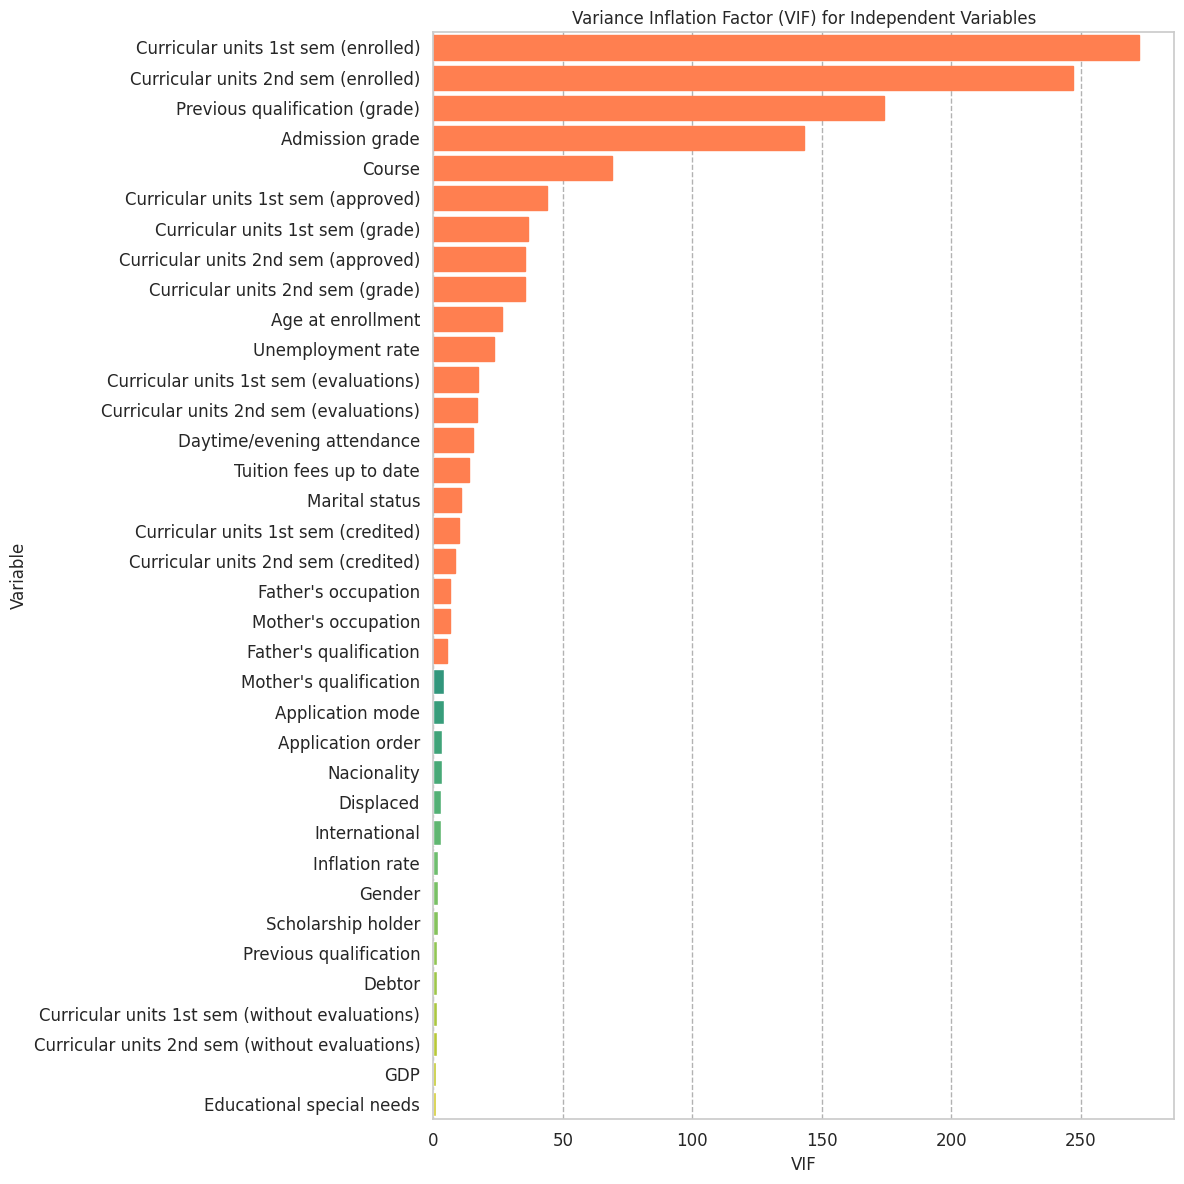

Variables with high VIF (> 5):


,Variable,VIF
22,Curricular units 1st sem (enrolled),272.407840
28,Curricular units 2nd sem (enrolled),246.948520
6,Previous qualification (grade),174.037079
12,Admission grade,143.239749
3,Course,69.015339
24,Curricular units 1st sem (approved),44.072076
25,Curricular units 1st sem (grade),36.669956
30,Curricular units 2nd sem (approved),35.504571
31,Curricular units 2nd sem (grade),35.250003
19,Age at enrollment,26.575501


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Sort the dataframe by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Set a VIF threshold (e.g., VIF > 5)
vif_threshold = 5

# Identify variables with high VIF that exceed the threshold
high_vif_variables = vif_data[vif_data["VIF"] > vif_threshold]

# Create a beautiful bar plot using Seaborn, highlighting high VIF variables
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")

# Highlight high VIF variables
for bar in plot.patches:
    if bar.get_width() > vif_threshold:
        bar.set_color('coral')

plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('Variance Inflation Factor (VIF) for Independent Variables')
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')  # Add grid lines
plt.tight_layout()  # Adjust layout for better appearance
plt.show()
print("Variables with high VIF (> {}):".format(vif_threshold))
high_vif_variables.style.background_gradient()

In [ ]:


# target_columns = ['Target_encoded']

# # Perform pairwise t-tests for each target column with all other columns
# p_values = {}
# for target in target_columns:
#     p_values[target] = {}  # Initialize a dictionary for storing p-values for this target
#     for column in train_temp.columns:
#         if column != target:  # Exclude the target column itself
#             t_stat, p_value = ttest_ind(train_temp[target], train_temp[column])
#             p_values[target][column] = p_value

# # Convert the nested dictionary to a DataFrame for better visualization
# p_values_df = pd.DataFrame(p_values)

# # Plotting the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(p_values_df, cmap='viridis', annot=True, fmt=".2f")
# plt.title('Pairwise t-test p-values with respect to Rings')
# plt.xlabel('Columns')
# plt.ylabel('Target Columns')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()
# print("P-values for Hypothesis Testing:")
# p_values_df.style.background_gradient()



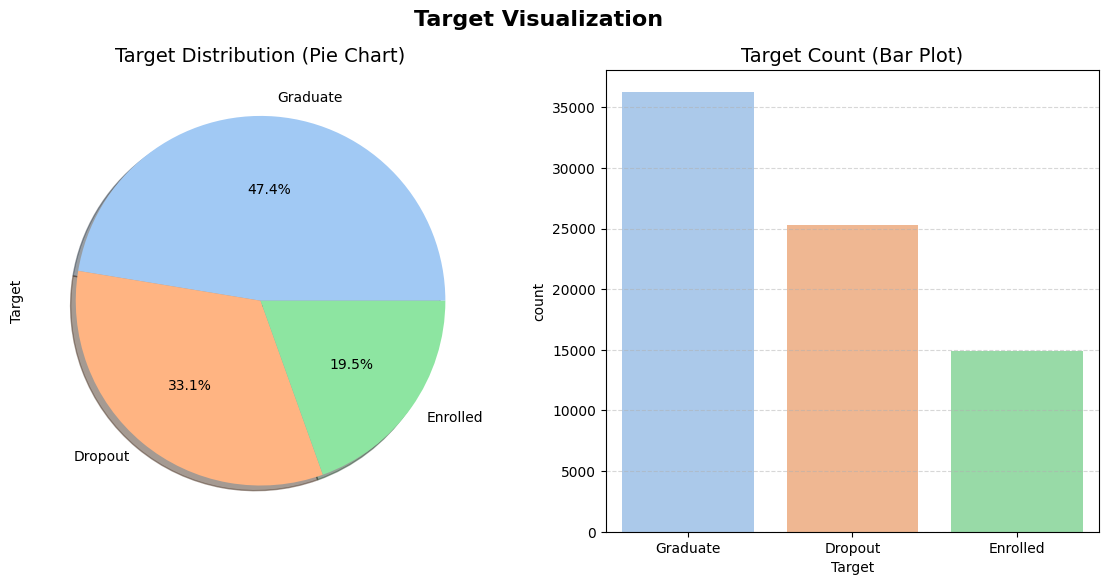

Columns in Target column are: Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64


In [ ]:
# @title category feature disturbutions
import warnings
warnings.filterwarnings("ignore")
def target_plot(column,train):
    custom_palette = sns.color_palette("pastel")
    f, ax = plt.subplots(1, 2, figsize=(14,6))
    train[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Columns in Target column are:",train[column].value_counts())

target_plot('Target',Data)

In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train):
      import warnings
      warnings.filterwarnings("ignore")
      hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
      fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')
      axes[0].legend(title='Fault Types', loc='upper right')

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, hue_order=hue_columns, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')
      axes[1].legend(title='Fault Types', loc='upper right')

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()
target3_plot('Application mode',Data)

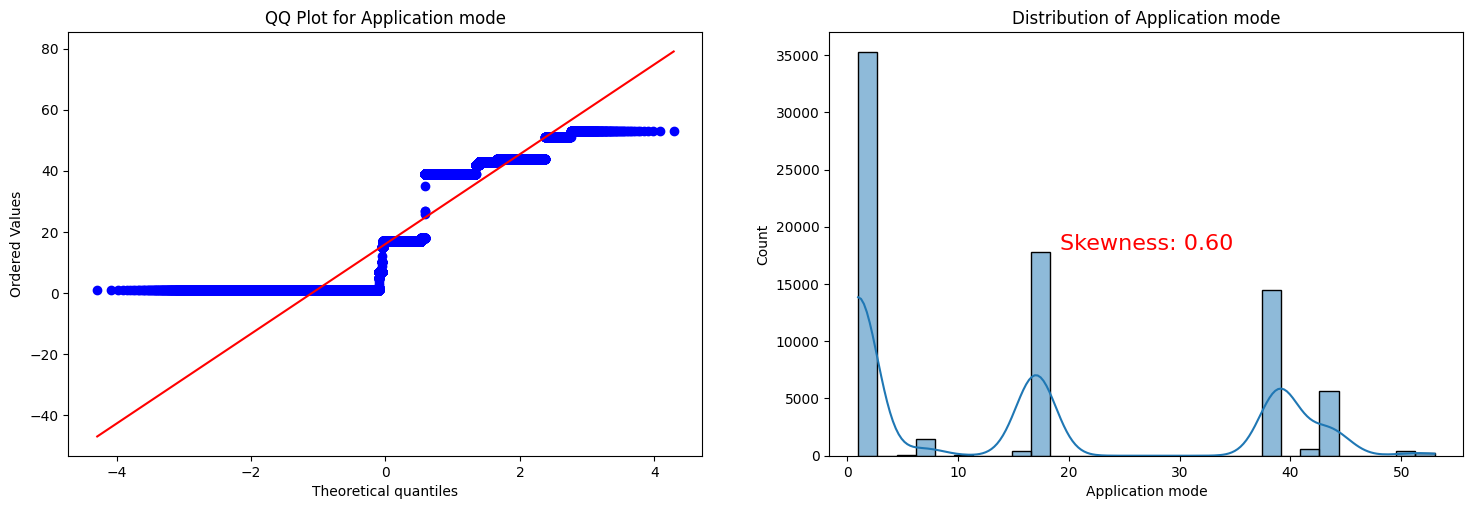

In [ ]:
# @title skew plot
import scipy.stats as stats
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return

    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    stats.probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = stats.skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes,
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()
# Example usage for each continuous variable
qq_plot_with_skewness(Data,'Application mode')

In [ ]:
# @title cat & cont fea
def cat_fea(train):


  unique_counts = train.nunique()
  #Threshold to distinguish continous and categorical
  threshold = 12
  continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
  categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
  return continuous_vars,categorical_vars


continuous_vars,categorical_vars=cat_fea(x)

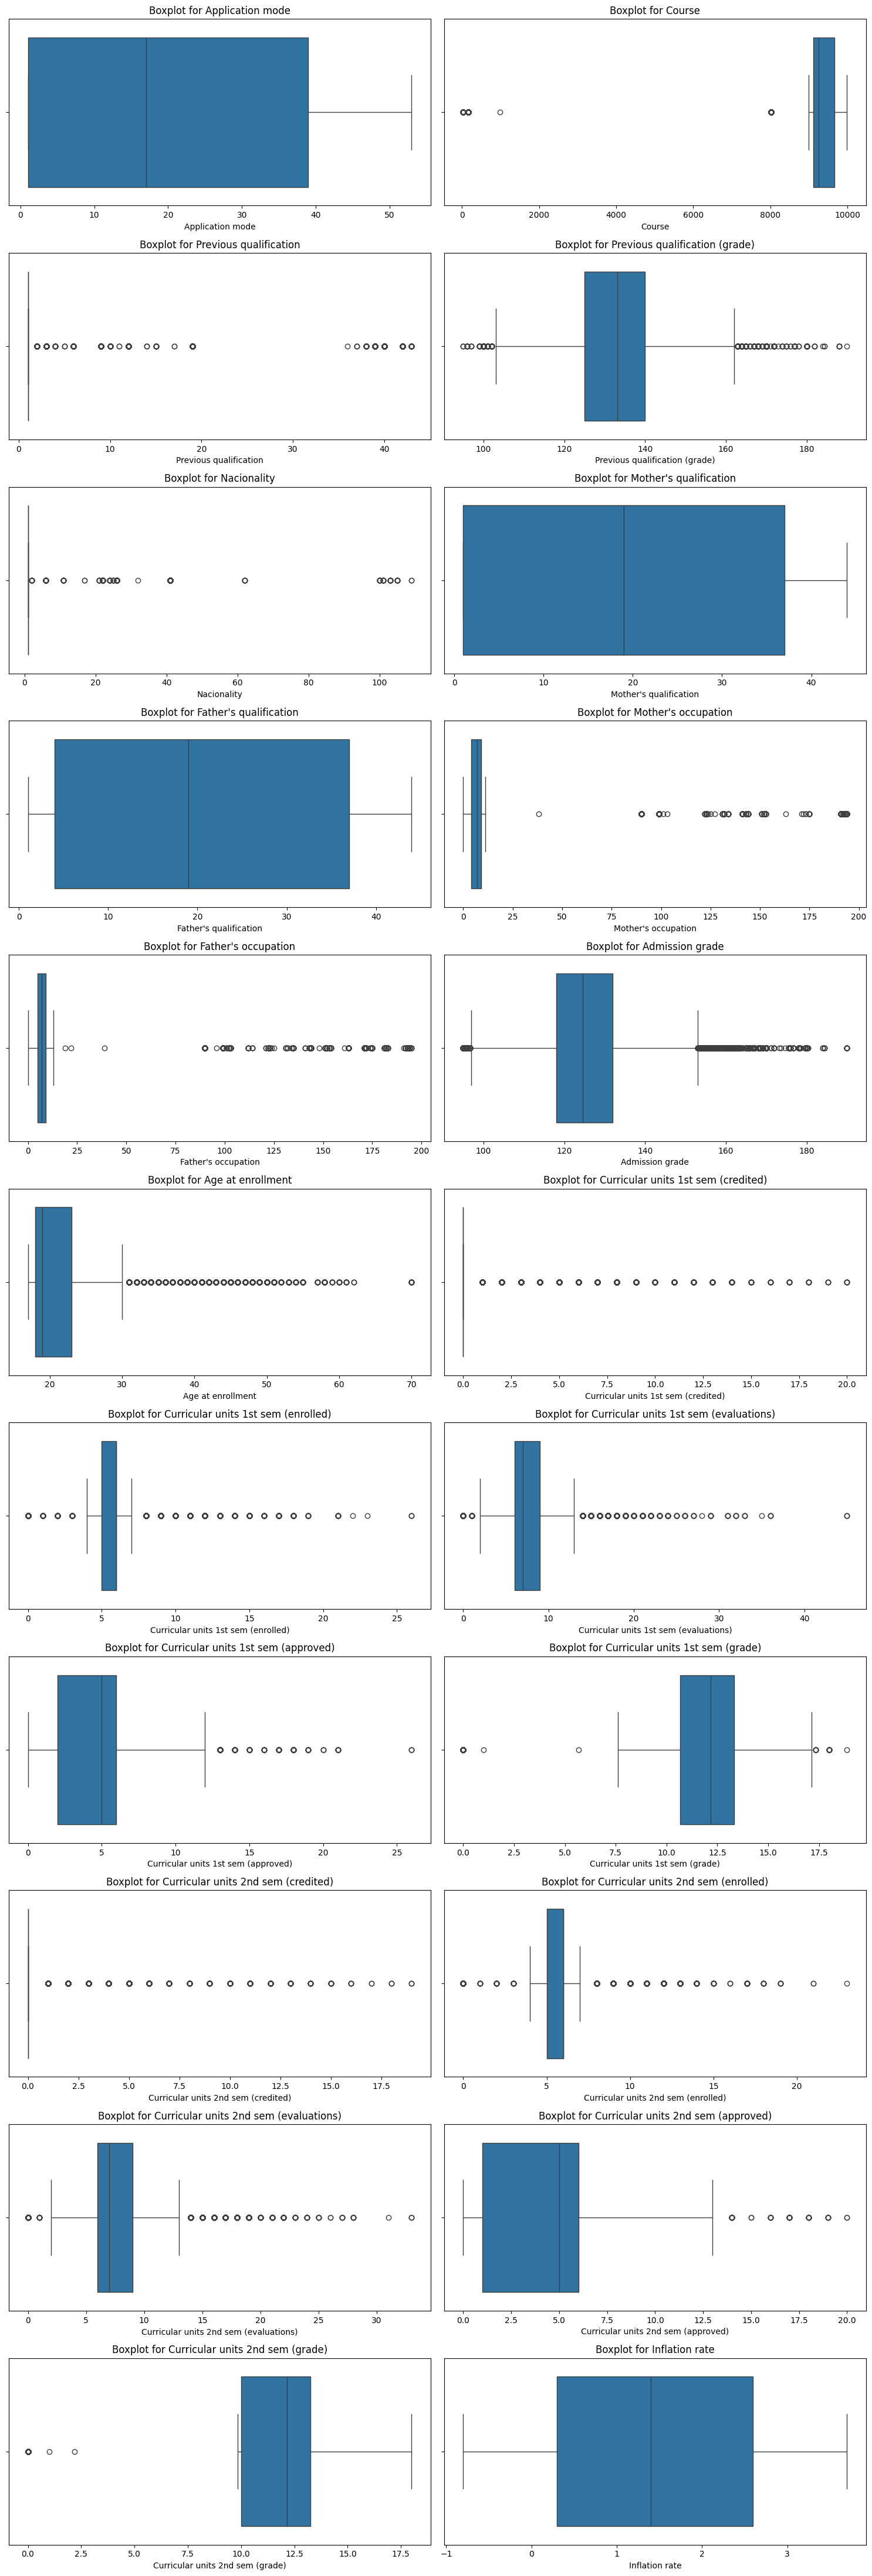

In [ ]:
# @title boxplot
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(Data, continuous_vars)



In [ ]:
# @title info
def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  desc['unique']=df.nunique()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  #desc = pd.concat([desc,df.describe().T.drop('count',axis=1)],axis=1)
#   display(desc)
# describe(Data)


,dtype,null,%null,unique
id,int64,0,0.0,76518
Marital status,int64,0,0.0,6
Application mode,int64,0,0.0,22
Application order,int64,0,0.0,8
Course,int64,0,0.0,19
Daytime/evening attendance,int64,0,0.0,2
Previous qualification,int64,0,0.0,21
Previous qualification (grade),float64,0,0.0,110
Nacionality,int64,0,0.0,18
Mother's qualification,int64,0,0.0,35


In [ ]:
# def unique(df):
#  return [df[col].unique() for col in df.columns]
#  #x['Age at enrollment'].unique()
#  result.drop(['Educational special needs','Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'],axis=1).copy()
x=x.drop(['Nacionality','Daytime/evening attendance','Unemployment rate','Curricular units 1st sem (credited)','International','Curricular units 2nd sem (credited)'],axis=1).copy()

# x=x.drop(['Educational special needs','Curricular units 1st sem (credited)','International','Curricular units 2nd sem (credited)'],axis=1).copy()
# plt.scatter(y,Data['Curricular units 2nd sem (evaluations)'])

##future selection

---

In [ ]:
# @title removing outliers
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

columns_to_remove_outliers_replace = continuous_vars
x = remove_outliers_replace(x, columns_to_remove_outliers_replace)


In [ ]:
# @title removing outliers2
def remove_outliers_replace(data, columns, threshold=2.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

columns_to_remove_outliers_replace = continuous_vars
train = remove_outliers_replace(Data, columns_to_remove_outliers_replace)
# test = remove_outliers_replace(test, columns_to_remove_outliers_replace)


In [ ]:
target_encoded_column = target_column + '_encoded'
merged_data = pd.concat([X, train[target_encoded_column]], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# To highlight only the Target_encoded column in the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[[target_encoded_column]].sort_values(by=target_encoded_column, ascending=False), annot=True, cmap='Greens', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation with Target_encoded')
plt.show()

In [ ]:
correlation_matrix = X.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(60, 48))  # Increase the width and height as needed

# Plot the correlation matrix as a heatmap with larger boxes
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=2, square=True)

# Customize plot
plt.title('Correlation Matrix', fontsize=48)  # Increase the font size of the title
plt.xticks(fontsize=32)  # Increase the font size of x-axis labels
plt.yticks(fontsize=32)  # Increase the font size of y-axis labels
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the dataframe by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Set a VIF threshold (e.g., VIF > 5)
vif_threshold = 5

# Identify variables with high VIF that exceed the threshold
high_vif_variables = vif_data[vif_data["VIF"] > vif_threshold]

# Create a beautiful bar plot using Seaborn, highlighting high VIF variables
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")

# Highlight high VIF variables
for bar in plot.patches:
    if bar.get_width() > vif_threshold:
        bar.set_color('coral')

plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('Variance Inflation Factor (VIF) for Independent Variables')
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')  # Add grid lines
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [ ]:
target_columns = ['Target_encoded']

# Perform pairwise t-tests for each target column with all other columns
p_values = {}
for target in target_columns:
    p_values[target] = {}  # Initialize a dictionary for storing p-values for this target
    for column in train_temp.columns:
        if column != target:  # Exclude the target column itself
            t_stat, p_value = ttest_ind(train_temp[target], train_temp[column])
            p_values[target][column] = p_value

# Convert the nested dictionary to a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Pairwise t-test p-values with respect to Rings')
plt.xlabel('Columns')
plt.ylabel('Target Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

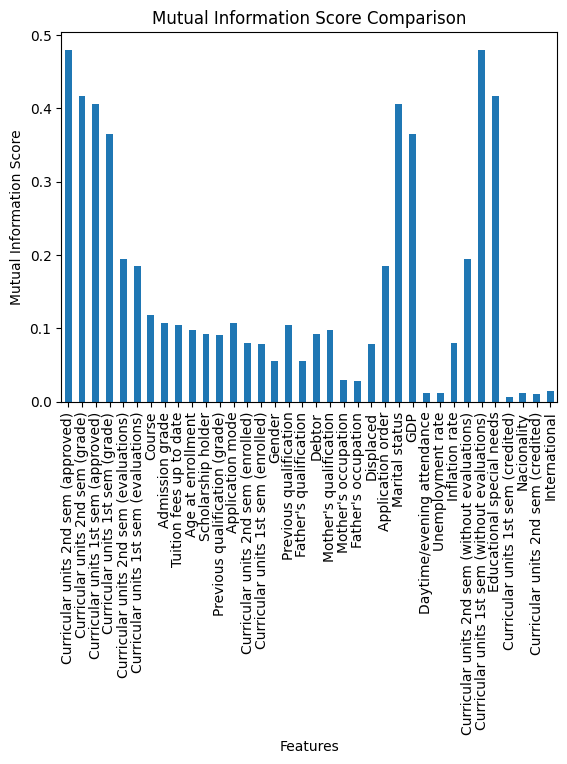

<Figure size 400x400 with 0 Axes>

----------------------------------
Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Admission grade', 'Tuition fees up to date', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')
----------------------------------


In [ ]:
# @title mutual information
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as  plt
%matplotlib   inline

importances  =mutual_info_classif(x,y,random_state=0)
MI=pd.Series(importances,x.columns)
MI.plot.bar()
#(kind='barh',color ='teal')
MI.sort_values(ascending=False,inplace=True)
MI.plot.bar()
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.figure(figsize=(4,4))
plt.show()
to_select = np.where(importances>= 0.07)
print('----------------------------------')
print(x.columns[to_select])
print('----------------------------------')
a=[i for i in x.columns[np.where(importances>= 0.05)]]


In [ ]:
#x=x.drop(['International','Educational special needs','Curricular units 1st sem (credited)'],axis=1).copy()


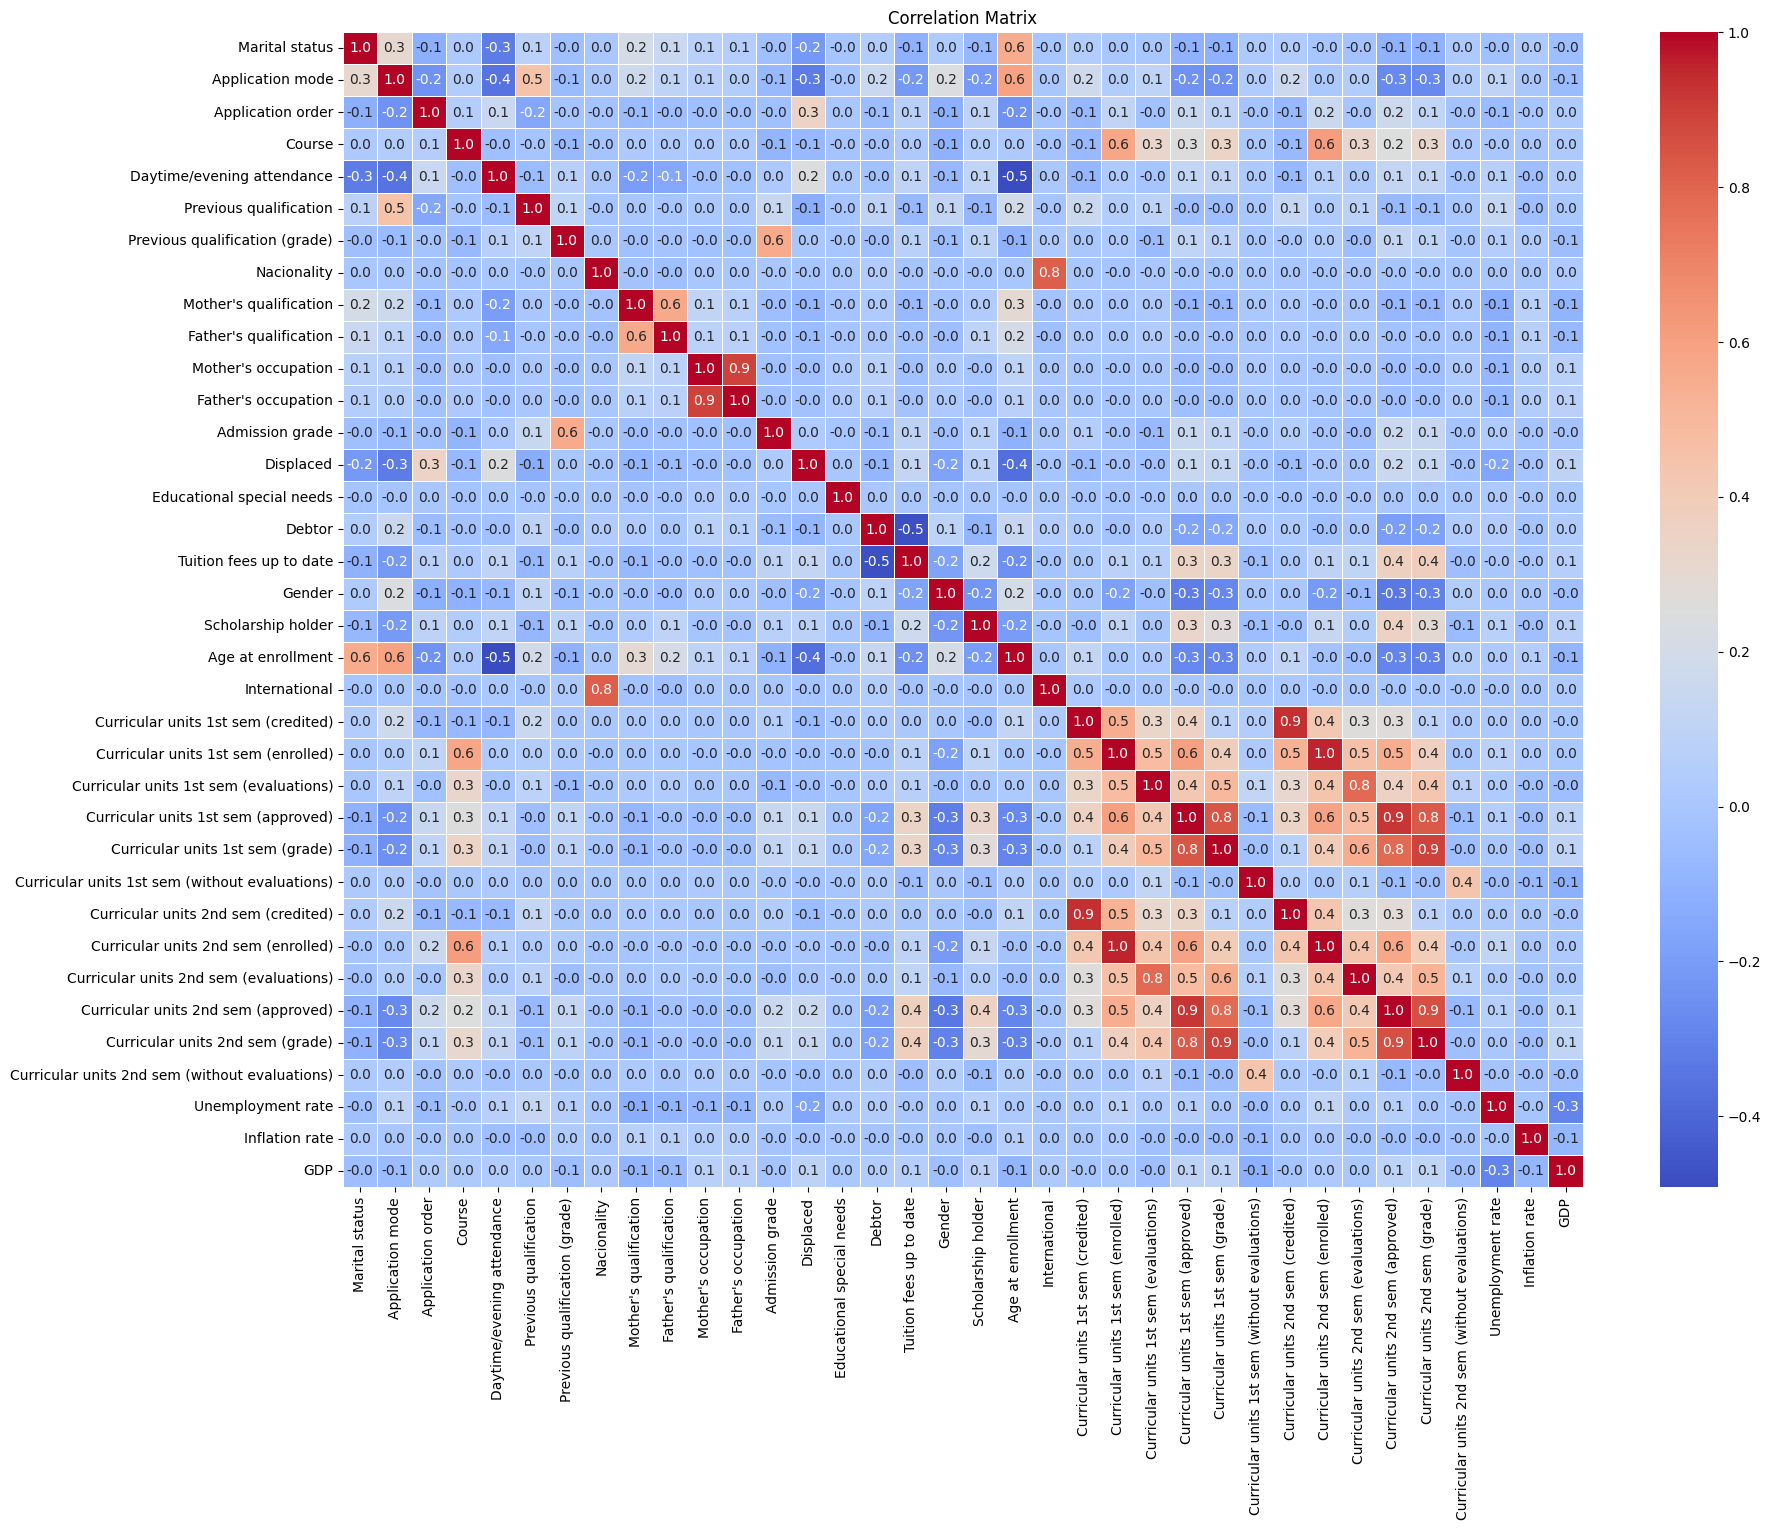

Correlation with Target:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Target                                            1.000000
Gender                                            0.212961
Application mode                                  0.178354
Age at enrollment                                 0.131291
Debtor                                            0.102055
Curricular units 1st sem (evaluations)            0.095589
Curricular units 2nd sem (evaluations)            0.084115
Curricular units 2nd sem (without evaluations)    0.068818
Previous qualification                            0.056724
Curricular units 1st sem (without evaluations)    0.053365
Marital status                                    0.047468
Mother's occupation                               0.036347
Father's occupation                               0.028271
Mother's qualification                            0.020355
Inflation rate                                    0.016117
Nacionality                                       0.00

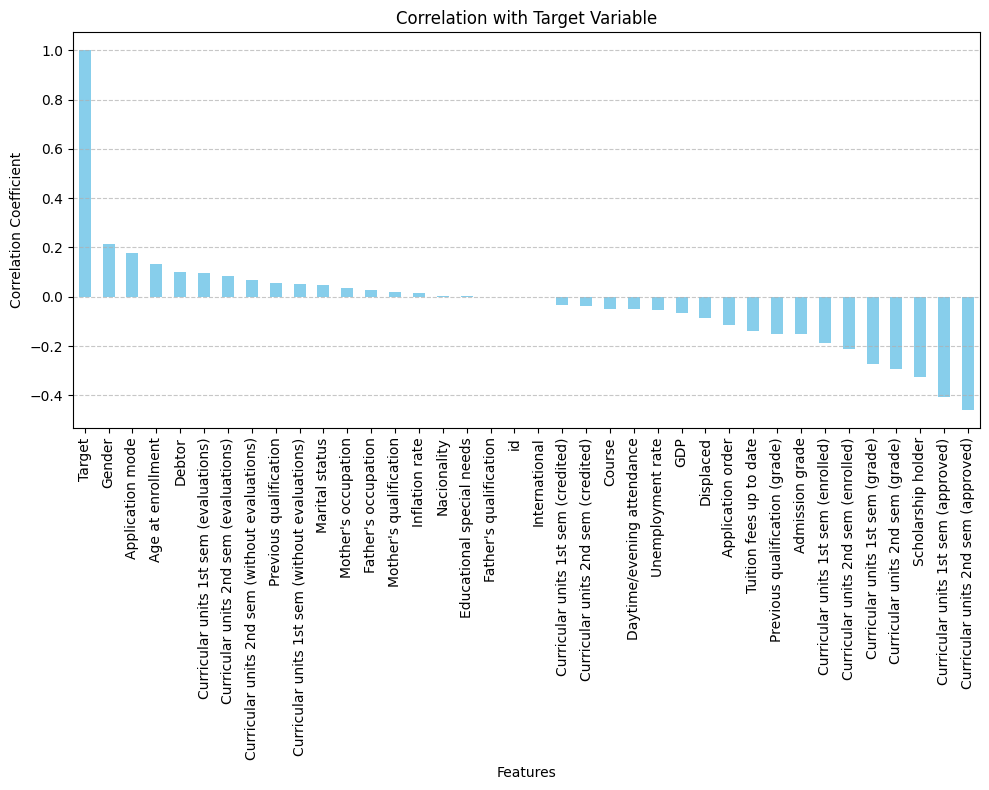

In [ ]:
  # @title correlatin graph
def cor_plot(x,m,target_column):
    correlation_matrix = x.corr()
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Correlation Matrix')
    plt.show()

    highly_correlated = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >= 0.7:
                highly_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

    less_correlated = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) <= 0.3:
                less_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j]))


    correlation_with_target = m.corr()[target_column].sort_values(ascending=False)
    print("Correlation with Target:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(correlation_with_target)



    plt.figure(figsize=(10, 8))
    correlation_with_target.plot(kind='bar', color='skyblue')
    plt.title('Correlation with Target Variable')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

cor_plot( x,Data.replace({'Graduate':0,'Dropout':1,'Enrolled':2}),'Target')



In [ ]:
# @title finding outlier
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
dftc = AV.AutoViz(x)

ModuleNotFoundError: No module named 'autoviz'

In [ ]:
# @title handling outliers
from scipy.stats import skew

def handle_skewed_columns(df):
    numerical_features = df.select_dtypes(include=[np.number])
    skewness = numerical_features.apply(lambda x: skew(x.dropna()))
    skewed_features = skewness[abs(skewness) > 1]

    for col in skewed_features.index:
        if df[col].min() > -1:
            df[f'{col}_log'] = np.log1p(df[col])
    return df

def add_interaction_features(df, columns):
    interaction_df = pd.DataFrame()
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            interaction_df[f'{col1}_plus_{col2}'] = df[col1] + df[col2]
            interaction_df[f'{col1}_minus_{col2}'] = df[col1] - df[col2]
            interaction_df[f'{col1}_times_{col2}'] = df[col1] * df[col2]
            interaction_df[f'{col1}_div_{col2}'] = df[col1] / (df[col2] + 1e-6)
    return interaction_df

def add_curriculum_interaction_features(df):
    df['Curriculum_interaction_1st_sem'] = df['Curricular units 1st sem (credited)'] * df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)'] * df['Curricular units 1st sem (approved)']
    df['Curriculum_interaction_2nd_sem'] = df['Curricular units 2nd sem (credited)'] * df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)'] * df['Curricular units 2nd sem (approved)']

def add_grade_interaction_features(df):
    df['Grade_interaction_1st_sem'] = df['Admission grade'] * df['Curricular units 1st sem (grade)']
    df['Grade_interaction_2nd_sem'] = df['Admission grade'] * df['Curricular units 2nd sem (grade)']

def add_age_interaction_features(df):
    df['Age_interaction'] = df['Age at enrollment'] * df['Previous qualification (grade)']

def add_economic_interaction_features(df):
    df['Economic_interaction'] = df['Unemployment rate'] * df['Inflation rate'] * df['GDP']

def add_qualification_interaction_features(df):
    df['Qualification_interaction'] = df['Previous qualification'] * df['Admission grade']
    df['Course_interaction'] = df['Previous qualification'] * df['Course']

def add_occupation_interaction_features(df):
    df["Occupation_interaction"] = df["Mother's occupation"] * df["Father's occupation"]

def add_enrollment_evaluation_interaction_features(df):
    df['Enrollment_evaluation_interaction_1st_sem'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)']
    df['Enrollment_evaluation_interaction_2nd_sem'] = df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)']

def add_gender_marital_interaction_features(df):
    df['Gender_marital_interaction'] = df['Gender'] * df['Marital status']

def add_tuition_scholarship_interaction_features(df):
    df['Tuition_scholarship_interaction'] = df['Tuition fees up to date'] * df['Scholarship holder']

def feature_engineer_train(df_train):
    df_train = handle_skewed_columns(df_train)
    economic_cols = ['Unemployment rate', 'Inflation rate', 'GDP']
    relationship_cols = ["Mother's qualification"]
    economic_interactions = add_interaction_features(df_train, economic_cols)
    relationship_interactions = add_interaction_features(df_train, relationship_cols)
    df_train = pd.concat([df_train, economic_interactions, relationship_interactions], axis=1)
    add_curriculum_interaction_features(df_train)
    add_grade_interaction_features(df_train)
    add_age_interaction_features(df_train)
    add_economic_interaction_features(df_train)
    add_qualification_interaction_features(df_train)
    add_occupation_interaction_features(df_train)
    add_enrollment_evaluation_interaction_features(df_train)
    add_gender_marital_interaction_features(df_train)
    add_tuition_scholarship_interaction_features(df_train)
    return df_train

def feature_engineer_test(df_test):
    df_test = handle_skewed_columns(df_test)
    economic_cols = ['Unemployment rate', 'Inflation rate', 'GDP']
    relationship_cols = ["Mother's qualification"]
    economic_interactions = add_interaction_features(df_test, economic_cols)
    relationship_interactions = add_interaction_features(df_test, relationship_cols)
    df_test = pd.concat([df_test, economic_interactions, relationship_interactions], axis=1)
    add_curriculum_interaction_features(df_test)
    add_grade_interaction_features(df_test)
    add_age_interaction_features(df_test)
    add_economic_interaction_features(df_test)
    add_qualification_interaction_features(df_test)
    add_occupation_interaction_features(df_test)
    add_enrollment_evaluation_interaction_features(df_test)
    add_gender_marital_interaction_features(df_test)
    add_tuition_scholarship_interaction_features(df_test)
    return df_test

x=feature_engineer_train(x)

In [ ]:
upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print('Upper diagonal corelation matrix ')
display(upper_tri)
print('-----------------------------\n')
# Finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print('correlated features to be dropped=',to_drop );
print('-----------------------------\n')

Upper diagonal corelation matrix 


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,NaN,0.307324,0.113951,0.023141,0.323587,0.084064,0.037717,0.004660,0.198373,0.144820,...,0.023511,0.037268,0.005177,0.021254,0.111369,0.111216,0.025689,0.034481,0.019523,0.046165
Application mode,NaN,NaN,0.238497,0.040452,0.354834,0.451252,0.060636,0.005937,0.163590,0.102086,...,0.033103,0.159977,0.013383,0.047992,0.274728,0.271664,0.043298,0.098439,0.005130,0.065964
Application order,NaN,NaN,NaN,0.054168,0.147153,0.155281,0.013956,0.016601,0.062138,0.046074,...,0.018316,0.066853,0.150224,0.005080,0.166433,0.106326,0.019871,0.066022,0.004206,0.031860
Course,NaN,NaN,NaN,NaN,0.041557,0.011349,0.069488,0.018786,0.018063,0.022939,...,0.012660,0.066453,0.613658,0.328303,0.249484,0.316896,0.018007,0.001982,0.007152,0.024719
Daytime/evening attendance,NaN,NaN,NaN,NaN,NaN,0.057775,0.067332,0.006357,0.199593,0.147777,...,0.023854,0.071575,0.059326,0.023615,0.120979,0.110837,0.014665,0.063861,0.045270,0.037908
Previous qualification,NaN,NaN,NaN,NaN,NaN,NaN,0.105284,0.010346,0.001252,0.002976,...,0.003897,0.128899,0.027733,0.080597,0.069113,0.059210,0.001979,0.130838,0.046189,0.013527
Previous qualification (grade),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007707,0.034497,0.014052,...,0.000599,0.000320,0.030076,0.048591,0.121827,0.089353,0.011397,0.052112,0.028678,0.053731
Nacionality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024836,0.040848,...,0.010347,0.006125,0.012356,0.000051,0.008279,0.005232,0.002579,0.001823,0.001536,0.020058
Mother's qualification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567457,...,0.014500,0.017870,0.008667,0.002528,0.083516,0.082805,0.017145,0.126686,0.068696,0.099992
Father's qualification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004603,0.017971,0.000577,0.021645,0.021592,0.017741,0.004242,0.099637,0.064158,0.070477


-----------------------------

correlated features to be dropped= ["Father's occupation", 'International', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
-----------------------------



In [ ]:
# @title selectkebest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# configure to select all features
fs = SelectKBest(score_func=f_classif, k=25)
X_kbest_features =fs.fit_transform(x,y)

print('Before feature selection: shape-',x.shape)
print('After feature selection: shape-',X_kbest_features.shape)
display(pd.DataFrame(X_kbest_features))
print(fs)


chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Before feature selection: shape- (76518, 36)
After feature selection: shape- (76518, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,1.0,1.0,9238.0,1.0,1.0,126.0,1.0,122.6,0.0,...,6.0,6.0,6.0,14.500000,6.0,7.0,6.0,12.428571,0.0,2.02
1,1.0,17.0,1.0,9238.0,1.0,1.0,125.0,19.0,119.8,1.0,...,6.0,8.0,4.0,11.600000,6.0,9.0,0.0,0.000000,0.0,2.02
2,1.0,17.0,2.0,9254.0,1.0,1.0,137.0,3.0,144.7,0.0,...,6.0,0.0,0.0,0.000000,6.0,0.0,0.0,0.000000,0.0,-0.92
3,1.0,1.0,3.0,9500.0,1.0,1.0,131.0,19.0,126.1,1.0,...,7.0,9.0,7.0,12.591250,8.0,11.0,7.0,12.820000,0.0,2.02
4,1.0,1.0,2.0,9500.0,1.0,1.0,132.0,19.0,120.1,1.0,...,7.0,12.0,6.0,12.933333,7.0,12.0,6.0,12.933333,0.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1.0,17.0,1.0,9254.0,1.0,1.0,121.0,19.0,116.5,1.0,...,6.0,9.0,6.0,10.666667,6.0,8.0,5.0,10.600000,0.0,0.79
76514,1.0,1.0,6.0,9254.0,1.0,1.0,125.0,1.0,131.6,1.0,...,6.0,22.0,4.0,13.000000,6.0,9.0,6.0,13.875000,0.0,-3.12
76515,5.0,17.0,1.0,9085.0,1.0,1.0,138.0,37.0,123.3,1.0,...,5.0,13.0,4.0,12.500000,5.0,8.0,5.0,11.400000,1.0,-3.12
76516,1.0,1.0,3.0,9070.0,1.0,1.0,136.0,38.0,124.8,1.0,...,6.0,0.0,0.0,0.000000,6.0,0.0,0.0,0.000000,0.0,0.32


SelectKBest(k=25)


In [ ]:
# @title lda
y_train=ytr
y_test=yte
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
sc = StandardScaler()
X_train = sc.fit_transform(xtr)
X_test = sc.transform(xte)
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, ytr)
X_test = lda.transform(X_test)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

array([[6649,  136,  472],
       [ 387, 4077,  595],
       [1046,  344, 1598]])

Accuracy0.805279665446942


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# @title VARIANCE THRESHOLDING
###################################################
selector = VarianceThreshold(threshold=0.25)
# Perform variance thresholding
data=selector.fit_transform(x)

var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(x)
concol = [column for column in x.columns  if column not in x.columns[var_thr.get_support()]]

for features in concol:
    print(features)
#reduced number of features
print('----------------------')
print(' FEATURE and its VARIANCE')
print('----------------------')
for feature in zip(x.columns, selector.variances_):
    display(feature)
# Print the results
print('Number of features before variance thresholding: {}'.format(x.shape))
print('Number of features after variance thresholding: {}'.format(data.shape))
#convert label to dataframe
dflabel=pd.DataFrame([i for i in x.columns])
data=pd.DataFrame(data)
#concatenate seected features and class label
dfnew=pd.concat([data,y],axis=1)
x=x.drop(concol,axis=1).copy()
#plot graph
# sns.pairplot(dfnew,  hue='class',  palette='coolwarm')
# display(dfnew)

Marital status
Daytime/evening attendance
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (without evaluations)
----------------------
 FEATURE and its VARIANCE
----------------------


('Marital status', 0.1950688918056553)

('Application mode', 278.2967328090396)

('Application order', 1.5120071663673802)

('Course', 3252348.031229507)

('Daytime/evening attendance', 0.07751424506035941)

('Previous qualification', 74.36850000198223)

('Previous qualification (grade)', 120.89565852009095)

('Nacionality', 11.506756289971957)

("Mother's qualification", 237.1401598589152)

("Father's qualification", 222.63822843386856)

("Mother's occupation", 305.2524879578553)

("Father's occupation", 282.368719234442)

('Admission grade', 157.81002566677526)

('Displaced', 0.24520239466180108)

('Educational special needs', 0.0037237123652720306)

('Debtor', 0.06628652184066261)

('Tuition fees up to date', 0.09504287430138542)

('Gender', 0.2160781379467346)

('Scholarship holder', 0.18618958751771542)

('Age at enrollment', 47.461022928528934)

('International', 0.006581989502899641)

('Curricular units 1st sem (credited)', 1.3813016832197305)

('Curricular units 1st sem (enrolled)', 2.794799550518658)

('Curricular units 1st sem (evaluations)', 12.307948826034037)

('Curricular units 1st sem (approved)', 7.22522041368863)

('Curricular units 1st sem (grade)', 27.711688089592172)

('Curricular units 1st sem (without evaluations)', 0.16686199888791067)

('Curricular units 2nd sem (credited)', 0.8720265575332476)

('Curricular units 2nd sem (enrolled)', 2.6476874221006983)

('Curricular units 2nd sem (evaluations)', 12.271131170047623)

('Curricular units 2nd sem (approved)', 7.689184666262256)

('Curricular units 2nd sem (grade)', 30.758098255941768)

('Curricular units 2nd sem (without evaluations)', 0.21353992769485103)

('Unemployment rate', 7.0403081933437015)

('Inflation rate', 1.9566615864108114)

('GDP', 5.068652501131031)

Number of features before variance thresholding: (76518, 36)
Number of features after variance thresholding: (76518, 25)


In [ ]:
# @title finding duplicate columns
def find_duplicate_columns(df):

> Add blockquote


    """
    Find duplicate columns in a dataframe.

    Args:
    df (pd.DataFrame): The dataframe to check for duplicate columns.

    Returns:
    list: A list of lists, where each sublist contains the names of duplicate columns.
    """
    duplicate_columns = []
    columns = df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if df[columns[i]].equals(df[columns[j]]):
                duplicate_columns.append((columns[i], columns[j]))
    return duplicate_columns

In [ ]:
#Calculate MAD
mean_abs_diff =np.sum(np.abs(x-np.mean(x,axis =0 )),axis =0)/x.shape[0]
#Plot the barchart
plt.bar(np.arange(x.shape[1]),mean_abs_diff,color ='teal')


In [ ]:
#!pip install skfeature-chappers

In [ ]:
# from skfeature.function.similarity_based import fisher_score

# ranks =fisher_score.fisher_score(x.to_numpy(),y.to_numpy())
# #Plotting the ranks
# feat_importances=pd.Series(ranks,x.columns[0:len(x.columns)])
# feat_importances.plot(kind='barh',color ='teal')
# plt.show()

In [ ]:
x=x.drop([''])

In [ ]:
 x=x.drop(['Daytime/evening attendance','Marital status','Application order','GDP','Unemployment rate','Inflation rate','Displaced'],axis=1).copy()


nationality,credited 1st sem,special needs,2nd sem without eval,1st without eval,credited 2nd sem
normalize course

possible graph
* id cannot be used for graph
* first use target(y) for plotting
* pattern might be due two reason either it is related to the target or only that data is available
* try to discard unwanted columns since it can bring biases with it
* try to  find most related columns


##model

---

In [ ]:
def add_interaction_features(df):
    df['Application_mode_x_Application_order'] = df['Application mode'] * df['Application order']
    df['Course_x_Curricular_units_1st_sem_enrolled'] = df['Course'] * df['Curricular units 1st sem (enrolled)']
    df['Daytime_evening_attendance_x_Age_at_enrollment'] = df['Daytime/evening attendance'] * df['Age at enrollment']
    df['Previous_qualification_grade_x_Admission_grade'] = df['Previous qualification (grade)'] * df['Admission grade']
    df['Displaced_x_Curricular_units_1st_sem_approved'] = df['Displaced'] * df['Curricular units 1st sem (approved)']
    df['Scholarship_holder_x_Tuition_fees_up_to_date'] = df['Scholarship holder'] * df['Tuition fees up to date']
    df['Curricular_units_1st_sem_approved_x_Curricular_units_2nd_sem_approved'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
    df['Unemployment_rate_x_Inflation_rate'] = df['Inflation rate']*df['GDP']*df['Unemployment rate']
    return df

In [ ]:
x=add_interaction_features(x)
result=add_interaction_features(result)

In [ ]:
https://www.kaggle.com/code/satyaprakashshukl/simple-neural-anlysis-blend-sol?scriptVersionId=185861454&cellId=11

In [ ]:
x=x.drop(['Curricular units 3nd sem (without evaluations)','Curricular units 1st sem (without evaluations)'],axis=1).copy()

KeyError: "['Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (without evaluations)'] not found in axis"

In [ ]:

# from sklearn.preprocessing import StandardScaler
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# sc = StandardScaler()
# X_train = sc.fit_transform(xtr)
# X_test = sc.transform(xte)
# lda = LDA(n_components=2)
# xtr = lda.fit_transform(X_train, ytr)
# xte = lda.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y                              )

using *DescisionTree*

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(xtr,ytr)
model.score(xte,yte)

0.7437271301620492

*using* *GaussianNB*

---



In [ ]:

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

model.fit(xtr,ytr)
model.score(xte,yte)

0.7652901202300052

In [ ]:
x.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02


using *randomforest*

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=41,max_depth=12,max_features=10)
model.fit(xtr,ytr)
model.score(xte,yte)

0.8210271824359645

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00


In [ ]:


cat_features = ['Marital status', 'Application mode', 'Course',
                'Previous qualification', 'Nacionality', "Mother's qualification",
                "Father's qualification", "Mother's occupation",
                "Father's occupation"]
for feature in cat_features:
    dtype = pd.CategoricalDtype(categories=list(set(x[feature]) | set(result[feature]) ), ordered=False)
    for df in [x,result]:
        df[feature] = df[feature].astype(dtype)



In [ ]:
from xgboost import XGBClassifier


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna

def create(trial):
  params = {
          "min_child_weight":trial.suggest_int('min_child_weight',1,5),
          "max_depth": trial.suggest_int("max_depth", 5, 10),
          "gamma":trial.suggest_float('gamma',0,0.5),
          "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.2, log=True),
          "subsample": trial.suggest_float("subsample", 0.5, 1.0),
          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
          "reg_alpha":trial.suggest_float('reg_alpha',0 ,5),
      }
  return params



model=XGBClassifier(
     learning_rate =0.1, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0,
 objective= 'multi: softmax')

def objective(trial):


    params=create(trial)
    model.set_params(**params)
    model.fit(xtr, ytr)
    predictions = model.predict(xte)
    cross = cross_val_score(model, xtr,ytr, n_jobs=-1).mean()
    acc = accuracy_score(yte, predictions, normalize=True)
    rmse = -mean_squared_error(yte, predictions)
    return rmse

optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

#print('Best hyperparameters:', study.best_params)
#print('Best RMSE:', study.best_value)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-30 04:14:12,298] A new study created in memory with name: no-name-dd5481db-d689-4a3c-a451-9a4315991ad7
[I 2024-06-30 04:17:37,312] Trial 0 finished with value: -0.4319785676947203 and parameters: {'min_child_weight': 2, 'max_depth': 6, 'gamma': 0.2871733548712291, 'learning_rate': 0.041284026180433135, 'subsample': 0.6511699854156885, 'colsample_bytree': 0.9124756415059665, 'reg_alpha': 2.389056507824719}. Best is trial 0 with value: -0.4319785676947203.
[I 2024-06-30 04:21:38,675] Trial 1 finished with value: -0.4377286983795086 and parameters: {'min_child_weight': 1, 'max_depth': 8, 'gamma': 0.10140248359599119, 'learning_rate': 0.013128893867844925, 'subsample': 0.8081377944152803, 'colsample_bytree': 0.7490657612545479, 'reg_alpha': 0.4027415027528952}. Best is trial 0 with value: -0.4319785676947203.
[I 2024-06-30 04:27:26,106] Trial 2 finished with value: -0.4351150026136958 and parameters: {'min_child_weight': 3, 'max_depth': 10, 'gamma': 0.2569628550357905, 'learning

Number of finished trials: 10
Best trial:
  Value: -0.41655776267642447
  Params: 
    min_child_weight: 5
    max_depth: 7
    gamma: 0.2983411403585277
    learning_rate: 0.09875794438626295
    subsample: 0.7802677078338323
    colsample_bytree: 0.6950936383911261
    reg_alpha: 3.187223621862519


In [ ]:
model=XGBClassifier( min_child_weight=2, max_depth=9, gamma=0.21454958498734067,learning_rate =0.08046940510884702
, subsample= 0.8039955459977797,reg_alpha=3.562624680511623,colsample_bytree= 0.9897560460818977,
objective= 'multi: softmax')

model.fit(xtr,ytr)
model.score(xte,yte)

0.832723470987977

In [ ]:

import optuna

import sklearn.datasets
import sklearn.metrics
import xgboost as xgb


SEED = 108
N_FOLDS = 3



def objective(trial):
    dtrain = xgb.DMatrix(xtr, label=ytr)

    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
      # Model is an XGBClassifier
    # xgb_param = dtrain.get_xgb_params()
    param['num_class'] = 3
    # cvresult = xgb.cv(xgb_param, ...)
    xgb_cv_results = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=10000,
        nfold=N_FOLDS,
        stratified=True,
        early_stopping_rounds=100,
        seed=SEED,
        verbose_eval=False,
    )

    # Set n_estimators as a trial attribute; Accessible via study.trials_dataframe().
    trial.set_user_attr("n_estimators", len(xgb_cv_results))

    # Save cross-validation results.
    # filepath = os.path.join(CV_RESULT_DIR, "{}.csv".format(trial.number))
    # xgb_cv_results.to_csv(filepath, index=False)

    # Extract the best score.
    best_score = xgb_cv_results["test-auc-mean"].values[-1]
    return best_score


# if _name_ == "_main_":
#     if not os.path.exists(CV_RESULT_DIR):
#         os.mkdir(CV_RESULT_DIR)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

print("  Number of estimators: {}".format(trial.user_attrs["n_estimators"]))



[I 2024-06-30 04:08:38,817] A new study created in memory with name: no-name-48b44b4f-43cd-4ef4-98cb-b29d39d63824
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))
[W 2024-06-30 04:08:44,395] Trial 0 failed with param

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna

def create(trial):
  params = {
          "min_child_weight":trial.suggest_int('min_child_weight',1,5),
          "max_depth": trial.suggest_int("max_depth", 5, 10),
          #"iterations": 100,
          "gamma":trial.suggest_float('gamma',0,0.5),
          "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.2, log=True),
          "subsample": trial.suggest_float("subsample", 0.5, 1.0),
          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
          "reg_alpha":trial.suggest_float('reg_alpha',0 ,5),
         # "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
      }
  return params



model=XGBClassifier(
     learning_rate =0.1, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0,
 objective= 'multi: softmax')

def objective(trial):


    params=create(trial)
    model.set_params(**params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    model.fit(xtr,ytr ,callbacks=[pruning_callback])

    predictions = model.predict(xte)
    cross = cross_val_score(model, xtr,ytr, n_jobs=-1).mean()
    acc = accuracy_score(yte, predictions, normalize=True)
    rmse = -mean_squared_error(yte, predictions)
    return cross

optuna.logging.set_verbosity(optuna.logging.INFO)

study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
)
study.optimize(objective, n_trials=10)

#print('Best hyperparameters:', study.best_params)
#print('Best RMSE:', study.best_value)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-29 04:12:04,525] A new study created in memory with name: no-name-39a07485-7a8f-4dd4-b4b7-de1e480cadda
[W 2024-06-29 04:12:04,530] Trial 0 failed with parameters: {'min_child_weight': 1, 'max_depth': 6, 'gamma': 0.21113967326246103, 'learning_rate': 0.10675684595224635, 'subsample': 0.9554712120667775, 'colsample_bytree': 0.8944985682399363, 'reg_alpha': 3.1794049372999944} because of the following error: ModuleNotFoundError("Optuna's integration modules for third-party libraries have started migrating from Optuna itself to a package called `optuna-integration`. The module you are trying to use has already been migrated to `optuna-integration`. Please install the package by running `pip install optuna-integration`.").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/integration/__init__.py", line 141, in _get_module
    return importlib.import_module("." + module_name, self.__name__)
  File "/usr/lib/python3.10/importlib/__init__.py",

ModuleNotFoundError: Optuna's integration modules for third-party libraries have started migrating from Optuna itself to a package called `optuna-integration`. The module you are trying to use has already been migrated to `optuna-integration`. Please install the package by running `pip install optuna-integration`.

In [ ]:
!pip install optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 1.6 MB/s eta 0:00:00


In [ ]:


import numpy as np
import optuna

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):

    train_x, valid_x, train_y, valid_y = train_test_split(x,y ,test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    # Add a callback for pruning.
    param['num_class'] = 3

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dvalid, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy



study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
)
study.optimize(objective, n_trials=10)
print(study.best_trial)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
k={}
for key, value in trial.params.items():
    k[key]=value
    print("    {}: {}".format(key, value))

[I 2024-06-25 11:45:03,807] A new study created in memory with name: no-name-467cc495-19de-4405-bd75-4a45d7b9a692


[0]	validation-auc:0.80839
[1]	validation-auc:0.81263
[2]	validation-auc:0.81989
[3]	validation-auc:0.82197
[4]	validation-auc:0.82166
[5]	validation-auc:0.82211
[6]	validation-auc:0.82295
[7]	validation-auc:0.82419
[8]	validation-auc:0.82576
[9]	validation-auc:0.82723


[I 2024-06-25 11:45:05,321] Trial 0 finished with value: 0.6898588604286461 and parameters: {'booster': 'gblinear', 'lambda': 0.397957595152124, 'alpha': 0.8622929354620206}. Best is trial 0 with value: 0.6898588604286461.


[0]	validation-auc:0.93098
[1]	validation-auc:0.93138
[2]	validation-auc:0.93188
[3]	validation-auc:0.93226
[4]	validation-auc:0.93253
[5]	validation-auc:0.93275
[6]	validation-auc:0.93276
[7]	validation-auc:0.93290
[8]	validation-auc:0.93297
[9]	validation-auc:0.93302


[I 2024-06-25 11:45:08,015] Trial 1 finished with value: 0.8203868269733403 and parameters: {'booster': 'gbtree', 'lambda': 3.2494133341738905e-07, 'alpha': 0.00017050102727212042, 'max_depth': 8, 'eta': 0.013459806584556526, 'gamma': 1.1294776914947613e-06, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.8203868269733403.


[0]	validation-auc:0.85964
[1]	validation-auc:0.87490
[2]	validation-auc:0.88531
[3]	validation-auc:0.89286
[4]	validation-auc:0.89859
[5]	validation-auc:0.90308
[6]	validation-auc:0.90667
[7]	validation-auc:0.90960
[8]	validation-auc:0.91202
[9]	validation-auc:0.91402


[I 2024-06-25 11:45:09,416] Trial 2 finished with value: 0.7811291165708312 and parameters: {'booster': 'gblinear', 'lambda': 3.239788668697591e-07, 'alpha': 3.373004233460551e-06}. Best is trial 1 with value: 0.8203868269733403.


[0]	validation-auc:0.92876
[1]	validation-auc:0.92881
[2]	validation-auc:0.92879
[3]	validation-auc:0.92879
[4]	validation-auc:0.92879
[5]	validation-auc:0.92879
[6]	validation-auc:0.92878
[7]	validation-auc:0.92878
[8]	validation-auc:0.92879
[9]	validation-auc:0.92878


[I 2024-06-25 11:45:10,964] Trial 3 finished with value: 0.8152639832723471 and parameters: {'booster': 'gbtree', 'lambda': 0.10770217791703533, 'alpha': 4.5313950249142667e-08, 'max_depth': 7, 'eta': 4.69120006162387e-05, 'gamma': 0.0012259650090256362, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.8203868269733403.


[0]	validation-auc:0.92606
[1]	validation-auc:0.92623
[2]	validation-auc:0.92620
[3]	validation-auc:0.92621
[4]	validation-auc:0.92621
[5]	validation-auc:0.92621
[6]	validation-auc:0.92621
[7]	validation-auc:0.92622
[8]	validation-auc:0.92621
[9]	validation-auc:0.92621


[I 2024-06-25 11:45:14,025] Trial 4 finished with value: 0.8120230005227391 and parameters: {'booster': 'dart', 'lambda': 0.11727582054623431, 'alpha': 3.591414128005404e-08, 'max_depth': 6, 'eta': 3.800517061517417e-05, 'gamma': 1.0386394766769331e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.2806653660469246e-05, 'skip_drop': 1.0438681380669006e-07}. Best is trial 1 with value: 0.8203868269733403.


[0]	validation-auc:0.92196
[1]	validation-auc:0.93095
[2]	validation-auc:0.93405
[3]	validation-auc:0.93584
[4]	validation-auc:0.93738
[5]	validation-auc:0.93899
[6]	validation-auc:0.93958
[7]	validation-auc:0.94018
[8]	validation-auc:0.94076
[9]	validation-auc:0.94105


[I 2024-06-25 11:45:16,671] Trial 5 finished with value: 0.8295870360690015 and parameters: {'booster': 'dart', 'lambda': 0.0014494863960519866, 'alpha': 1.4892853143139697e-08, 'max_depth': 4, 'eta': 0.967134541419086, 'gamma': 5.375289320152052e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.0816214025650126e-07, 'skip_drop': 2.5424099441442676e-06}. Best is trial 5 with value: 0.8295870360690015.


[0]	validation-auc:0.85730
[1]	validation-auc:0.87299
[2]	validation-auc:0.88379
[3]	validation-auc:0.89157
[4]	validation-auc:0.89739


[I 2024-06-25 11:45:17,612] Trial 6 pruned. Trial was pruned at iteration 5.


[0]	validation-auc:0.85693
[1]	validation-auc:0.87260
[2]	validation-auc:0.88341
[3]	validation-auc:0.89134
[4]	validation-auc:0.89735


[I 2024-06-25 11:45:18,521] Trial 7 pruned. Trial was pruned at iteration 5.


[0]	validation-auc:0.92146
[1]	validation-auc:0.92539
[2]	validation-auc:0.92670
[3]	validation-auc:0.92693
[4]	validation-auc:0.92800
[5]	validation-auc:0.92849
[6]	validation-auc:0.92914
[7]	validation-auc:0.92987
[8]	validation-auc:0.93073
[9]	validation-auc:0.93151


[I 2024-06-25 11:45:20,403] Trial 8 finished with value: 0.8176163094615787 and parameters: {'booster': 'dart', 'lambda': 0.010192685942550796, 'alpha': 2.7024350160462796e-07, 'max_depth': 4, 'eta': 0.07353959915394251, 'gamma': 0.0006693578500139723, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 9.869449873553256e-08, 'skip_drop': 2.5040358803502206e-05}. Best is trial 5 with value: 0.8295870360690015.


[0]	validation-auc:0.93033
[1]	validation-auc:0.93073
[2]	validation-auc:0.93065
[3]	validation-auc:0.93072
[4]	validation-auc:0.93074
[5]	validation-auc:0.93076
[6]	validation-auc:0.93072
[7]	validation-auc:0.93076
[8]	validation-auc:0.93071
[9]	validation-auc:0.93074


[I 2024-06-25 11:45:21,279] Trial 9 finished with value: 0.8153685311029796 and parameters: {'booster': 'gbtree', 'lambda': 0.00032493381890852147, 'alpha': 0.02036287387024706, 'max_depth': 7, 'eta': 1.7345243561487336e-06, 'gamma': 0.001199311560551751, 'grow_policy': 'depthwise'}. Best is trial 5 with value: 0.8295870360690015.


FrozenTrial(number=5, state=TrialState.COMPLETE, values=[0.8295870360690015], datetime_start=datetime.datetime(2024, 6, 25, 11, 45, 14, 27625), datetime_complete=datetime.datetime(2024, 6, 25, 11, 45, 16, 670894), params={'booster': 'dart', 'lambda': 0.0014494863960519866, 'alpha': 1.4892853143139697e-08, 'max_depth': 4, 'eta': 0.967134541419086, 'gamma': 5.375289320152052e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.0816214025650126e-07, 'skip_drop': 2.5424099441442676e-06}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.9219632345713709, 1: 0.9309474434214643, 2: 0.9340542559224939, 3: 0.9358438487561067, 4: 0.9373750587735453, 5: 0.9389921198691582, 6: 0.939578268462997, 7: 0.9401815052394659, 8: 0.94075917501472, 9: 0.9410530800274886}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'gblinear', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistr

In [ ]:

train_x, valid_x, train_y, valid_y = train_test_split(x,y ,test_size=0.25)
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)


In [ ]:
k={}
for key, value in trial.params.items():
    k[key]=value

In [ ]:
trial.params.items()

dict_items([('booster', 'dart'), ('lambda', 0.0014494863960519866), ('alpha', 1.4892853143139697e-08), ('max_depth', 4), ('eta', 0.967134541419086), ('gamma', 5.375289320152052e-06), ('grow_policy', 'depthwise'), ('sample_type', 'uniform'), ('normalize_type', 'forest'), ('rate_drop', 1.0816214025650126e-07), ('skip_drop', 2.5424099441442676e-06)])

In [ ]:
bst = xgb.train(k, dtrain, evals=[(dvalid, "validation")])
preds = bst.predict(dvalid)
pred_labels = np.rint(preds)
accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels).mean()
print(accuracy)

[0]	validation-rmse:0.58742
[1]	validation-rmse:0.57867
[2]	validation-rmse:0.57413
[3]	validation-rmse:0.56885
[4]	validation-rmse:0.56792
[5]	validation-rmse:0.56688
[6]	validation-rmse:0.56641
[7]	validation-rmse:0.56459
[8]	validation-rmse:0.56347
[9]	validation-rmse:0.56358
0.7240460010454783


In [ ]:
model=XGBClassifier( min_child_weight=4, max_depth=7, gamma= 0.0011861949467868488,learning_rate = 0.3935493104442391
, subsample=0.6812756175372383,colsample_bytree= 0.5016427714877214,#booster='dart',
                     reg_lambda= 0.23633149794970065,reg_alpha=0.4188448155490268,
objective= 'multi: softmax')

model.fit(xtr,ytr)
model.score(xte,yte)

0.826646628332462

In [ ]:
model=XGBClassifier( min_child_weight=5, max_depth=7, gamma=0.38708243529985464,learning_rate =0.13609578246932594
, subsample=0.6812756175372383,reg_alpha=  1.5223584441984324,colsample_bytree= 0.5016427714877214,#booster='dart',
objective= 'multi: softmax')

model.fit(xtr,ytr)
model.score(xte,yte)

0.8326581285938317

In [ ]:
from mlxtend.feature_selection  import  SequentialFeatureSelector
ffs  =SequentialFeatureSelector(model,k_features=(30,36),forward  =True,floating=False,verbose=1,scoring='accuracy',n_jobs=-1)
ffs.fit(x,y)
features =(ffs.k_feature_names_)
#features =list(map(int,features))
display(features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  36 | elapsed:    8.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.1s finished
Features: 1/36[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    8.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    8.9s finished
Features: 2/36[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  34 | elapsed:    7.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    8.4s finished
Features: 3/36[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  33 | elapsed:    8.4s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    9.6s finished
Features: 4/36[Parallel(n_jobs=-1)]: Using

('Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP')

In [ ]:
a=[i for i in features]
x=x[a]

In [ ]:
len(features)

33

In [ ]:
# @title exp
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna
from optuna.pruners import SuccessiveHalvingPruner
from optuna.samplers import TPESampler
def create(trial):
  params = {
          "min_child_weight":trial.suggest_int('min_child_weight',1,5),
          "max_depth": trial.suggest_int("max_depth", 5, 10),
          #"iterations": 100,
          "gamma":trial.suggest_float('gamma',0,0.5),
          "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.2, log=True),
          "subsample": trial.suggest_float("subsample", 0.5, 1.0),
          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
          "reg_alpha":trial.suggest_float('reg_alpha',0 ,5),
         # "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
      }
  return params



model=XGBClassifier(
     learning_rate =0.1, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0,
 objective= 'multi: softmax')

def objective(trial):


    params=create(trial)
    model.set_params(**params)
   # Report the intermediate score for every step
    for step in range(100):
        model.partial_fit(xtr,ytr)
        # Report the intermediate objective value.
        intermediate_value = sgd.score(xte,yte)
        trial.report(intermediate_value, step)
        # Prune the intermediate value if neccessary.
        if trial.should_prune():
            raise optuna.TrialPruned()
    return sgd.score(xte,yte)

study = optuna.create_study(sampler = TPESampler(),
                            pruner = SuccessiveHalvingPruner(),
                            direction= "maximize")
study.optimize(objective, n_trials = 20)
pruned_trials = study.get_trials(states=[optuna.trial.TrialState.PRUNED])
complete_trials = study.get_trials(states=[optuna.trial.TrialState.COMPLETE])
print("# Pruned trials: ", len(pruned_trials))
print("# Complete trials: ", len(complete_trials))
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
model=XGBClassifier( min_child_weight=1, max_depth=8 , gamma= 0.2329099377456199,    learning_rate = 0.19687896808521382
, subsample= 0.4805098807229755,reg_alpha= 2.488976925634156,colsample_bytree= 0.4485797007521185,
 objective= 'multi: softmax')
model.fit(xtr,ytr)
model.score(xte,yte)

0.8316779926816519

using *xgbclassifier* and *hyperopt*

---



In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from xgboost import XGBClassifier
from hyperopt.early_stop import no_progress_loss
from xgboost import XGBClassifier
model=XGBClassifier(
     learning_rate =0.1, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi: softmax')
param_spaces={
   "learning_rate":hp.uniform('learning_rate',1e-5,0.2),

    "min_child_weight":hp.randint('min_child_weight',1,6),
    "max_depth" :hp.randint('max_depth',3,10),
    "gamma":hp.uniform('gamma',0,0.5),
    "subsample":hp.uniform('subsample',0.5,1),
   "colsample_bytree":hp.uniform('colsample_bytree',0.5,1),
   "reg_aplha":hp.uniform('reg_aplha',0,5),

}
#param_spaces = {'max_depth': hp.uniformint('max_depth',10, 15), 'max_features': hp.uniformint('max_features',0,14)}

def optim(params):

  acc = cross_val_score(model, xtr,ytr, n_jobs=-1).mean()
  return {"loss": -acc, "status": STATUS_OK}

trials=Trials()
best=fmin(
    fn=optim,
    space = param_spaces,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
   early_stop_fn=no_progress_loss(10)
)



display(trials.results)
print("Best: {}".format(best))
# trials.losses(),
# trials.statuses()

In [ ]:
Best: {'colsample_bytree':, 'gamma': , 'learning_rate': , 'max_depth': 9, 'min_child_weight': 2, 'reg_aplha': , 'subsample': }


In [ ]:
model=XGBClassifier( colsample_bytree=   0.6897829627087282, gamma=0.1345351870645588, max_depth=7 ,min_child_weight=1,     learning_rate = 0.19402378221319924
, subsample= 0.8755408124275464,reg_alpha=4.557188847061449,
 objective= 'multi: softmax')
model.fit(xtr,ytr)
model.score(xte,yte)

0.8328541557762676

In [ ]:
model=XGBClassifier( colsample_bytree= 0.644688760395339, gamma= 0, max_depth=8 ,min_child_weight=3,     learning_rate =0.19687896808521382
, subsample= 0.7946265600972636,reg_alpha=5,
 objective= 'multi: softmax')
model.fit(xtr,ytr)
model.score(xte,yte)

In [ ]:
model=XGBClassifier( colsample_bytree=  0.895225518992927, gamma= 0.2795809458416669, max_depth=8 ,min_child_weight=3,     learning_rate =0.19687896808521382
, subsample=0.8934704737938663,reg_alpha=72.76710812467445,
 objective= 'multi: softmax')
model.fit(xtr,ytr)
model.score(xte,yte)

In [ ]:
model=XGBClassifier( colsample_bytree=  0.7878144159634042, gamma=1, max_depth=5 ,min_child_weight=3,     learning_rate =0.5
, subsample=0.7930605053469856,reg_alpha=2,
 objective= 'multi: softmax')
model.fit(xtr,ytr)
model.score(xte,yte)

In [ ]:

model=XGBClassifier(
     learning_rate =0.1, max_depth=8,
 min_child_weight=3, gamma=0, subsample=0.7236379348824453, colsample_bytree= 0.979149490624277,reg_alpha= 0,
 objective= 'multi: softmax',seed=1)
model.fit(xtr,ytr)
model.score(xte,yte)

In [ ]:
jhg

using catboost and hyperopt

In [ ]:
!pip install catboost

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from xgboost import XGBClassifier
from hyperopt.early_stop import no_progress_loss


param_spaces={
     "depth" :hp.randint('depth',3,10),
   "subsample":hp.uniform('subsample',0.5,1),
   "colsample_bylevel":hp.uniform('colsample_bytree',0.5,1),
   "scale_pos_weight":hp.randint('scale_pos_weight',1,16,),
   "bagging_temperature":hp.uniform('bagging_temprature',0.0,1.0,),
   "random_strength":hp.randint('random_strength',1,20,),
   "reg_lambda":hp.uniform('reg_lambda',1.0,100),

}
model=CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
  bootstrap_type='Poisson',# The default is a Gaussian type and it only works on CPU
    #l2_leaf_reg=3.0
    #subsample=0.75,
    #loss_function:
    colsample_bylevel=0.75,
    min_data_in_leaf=23,
    random_state=42
)

def optim(params):

  acc = cross_val_score(model, xtr,ytr,scoring="accuracy", n_jobs=-1).mean()
  return {"loss": -acc, "status": STATUS_OK}

trials=Trials()
best=fmin(
    fn=optim,
    space = param_spaces,
    algo=tpe.suggest,
    max_evals=11,
    trials=trials,
    early_stop_fn=no_progress_loss(10)
)



display(trials.results)
print("Best: {}".format(best))
# trials.losses(),
# trials.statuses()

In [ ]:
from catboost import CatBoostClassifier


In [ ]:
model=CatBoostClassifier(
    subsample=0.756253522233977,
    scale_pos_weight= 4.932626967311057,
    reg_lambda= 12.465669681923794,
    random_strength= 1,
    iterations=100,
    learning_rate=0.1,
    depth=5,
    Batch_size
  #bootstrap_type='Poisson',# The default is a Gaussian type and it only works on CPU
    #l2_leaf_reg=3.0
    #subsample=0.75,
    #loss_function:
    colsample_bylevel=0.75,
    min_data_in_leaf=23,
    random_state=42
)
model.fit(xtr,ytr)
model.score(xte,yte)

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]


clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')

clf.fit(xtr,ytr)
clf.score(xte,yte)

In [ ]:
print(clf.best_params_)

print(clf.best_score_)

* 0.7354286461055933 1st tree
* 0.7694066910611604 2nd gaussianNB
* 0.8262545739675902 3rd randomforest
* 0.8301751176163095 4th xgbclassifier


In [ ]:
model.fit(xtr,ytr)
model.score(xte,yte)

0.8374281233664401

In [ ]:
# result=result.drop(['Educational special needs','Curricular units 1st sem (credited)','International','Curricular units 2nd sem (credited)'],axis=1).copy()


In [ ]:
# result=result.drop(['Daytime/evening attendance','Marital status','Application order','GDP','Unemployment rate','Inflation rate','Displaced'],axis=1).copy()


In [ ]:
l=model.predict(result.drop('id',axis=1))


df=pd.DataFrame()
df['Target']=l

In [ ]:
DF=df.replace({0:'Graduate',1:'Dropout',2:'Enrolled'},inplace=True)

In [ ]:
df['id']=result['id']


NameError: name 'result' is not defined

In [ ]:
df

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/projects/academy/sample_submission.csv", index=False)


In [ ]:
print(l)